In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**DATA COLLECTION** - IMPORTING TWITTER SENTIMENT DATASET

TweetEval Dataset

In [ ]:
from datasets import load_dataset
dataset = load_dataset("tweet_eval", "sentiment")
print(dataset)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.78M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/901k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/167k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/45615 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/12284 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 45615
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 12284
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


Converting into Dataframe

In [ ]:
import pandas as pd

# Convert train split into DataFrame
df_train = dataset["train"].to_pandas()
df_val   = dataset["validation"].to_pandas()
df_test  = dataset["test"].to_pandas()


In [ ]:
print(df_train.head())

                                                text  label
0  "QT @user In the original draft of the 7th boo...      2
1  "Ben Smith / Smith (concussion) remains out of...      1
2  Sorry bout the stream last night I crashed out...      1
3  Chase Headley's RBI double in the 8th inning o...      1
4  @user Alciato: Bee will invest 150 million in ...      2


In [ ]:
twitter_data= df_train

In [ ]:
twitter_data.head()

,text,label
0,"""QT @user In the original draft of the 7th boo...",2
1,"""Ben Smith / Smith (concussion) remains out of...",1
2,Sorry bout the stream last night I crashed out...,1
3,Chase Headley's RBI double in the 8th inning o...,1
4,@user Alciato: Bee will invest 150 million in ...,2


**IMPORTING THE DEPENDENCIES (LIBRARIES AND MODULES)**

In [ ]:
!pip install wordcloud

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re   # regular expression (for pattern matching)
from nltk.corpus import stopwords  # nltk -> natural langage toolkit  ;  stopwords -> a, an, the, is, for, by, my, etc. (nltk=library , corpus=module)
from nltk.stem.porter import PorterStemmer  # Stemming -> reducing a word into it's root/key word
from sklearn.feature_extraction.text import TfidfVectorizer  # It changes the textual data into numerical data, so that we can feed it to the ML model
from sklearn.model_selection import train_test_split   # It splits entire data into training and testing data ; training data -> trains ML model, test data -> tests/evaluates the model
from sklearn.linear_model import LogisticRegression  # LR is the ML model that we our using
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Downloading the stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Printing the stopwords in English
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

**EDA (EXPLORATORY DATA ANALYSIS)**

In [ ]:
# Printing the first 5 rows
twitter_data.head()

,text,label
0,"""QT @user In the original draft of the 7th boo...",2
1,"""Ben Smith / Smith (concussion) remains out of...",1
2,Sorry bout the stream last night I crashed out...,1
3,Chase Headley's RBI double in the 8th inning o...,1
4,@user Alciato: Bee will invest 150 million in ...,2


Here, pd.read_csv is not reading the column names ; it's considering the first data row as the column names

In [ ]:
# Reaming the columns and reading the dataset again

# rename 'label' -> 'target'
twitter_data = twitter_data.rename(columns={"label": "target"})

In [ ]:
# Again printing the first 5 rows
twitter_data.head()

,text,target
0,"""QT @user In the original draft of the 7th boo...",2
1,"""Ben Smith / Smith (concussion) remains out of...",1
2,Sorry bout the stream last night I crashed out...,1
3,Chase Headley's RBI double in the 8th inning o...,1
4,@user Alciato: Bee will invest 150 million in ...,2


In [ ]:
# printing any 8 rows
twitter_data.sample(8)

,text,target
40853,@user was at home and @user was on the road so...,1
18235,Beyond Eyes Out Tomorrow on PS4: Hey PlayStati...,1
7416,"""Oooh realized yesterday I never did tweet a c...",1
37365,@user k don\u2019t think I can be there but I\...,0
37859,"""Hey Mr \""""""""Ego\"""""""" October...Gary Carter & ...",0
38546,Super Eagles Coach Sunday Oliseh has revealed ...,1
32664,"""Vincent Jackson limited in Monday practice es...",2
28917,Do we really care about our kids future? Think...,0


In [ ]:
# Printing the number of rows and columns of the dataset
twitter_data.shape

(45615, 2)

In [ ]:
# Printing the information of the data in the columns
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45615 entries, 0 to 45614
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    45615 non-null  object
 1   target  45615 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 712.9+ KB


In [ ]:
# Printing the statistics
twitter_data.describe()

,target
count,45615.000000
mean,1.235800
std,0.700859
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [ ]:
# Checking the ditribution of traget column
twitter_data['target'].value_counts()

,count
target,
1,20673
2,17849
0,7093


In [ ]:
# Counting the number of missing values in each column
twitter_data.isnull().sum()

,0
text,0
target,0


**GRAPHS & CHARTS**

Sentiment Dsitribution Bar Chart (Shows Class balance)

/tmp/ipython-input-1421257517.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=twitter_data, palette='viridis')


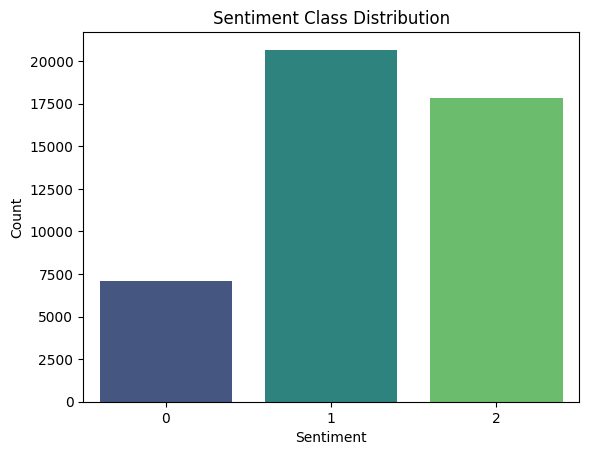

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='target', data=twitter_data, palette='viridis')
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

0 --> Negative

1 --> Neutral

2 --> Positive

Tweet Length Distribution

In [ ]:
twitter_data['tweet_length'] = twitter_data['text'].apply(len)
twitter_data.head()

,text,target,tweet_length
0,"""QT @user In the original draft of the 7th boo...",2,119
1,"""Ben Smith / Smith (concussion) remains out of...",1,84
2,Sorry bout the stream last night I crashed out...,1,124
3,Chase Headley's RBI double in the 8th inning o...,1,139
4,@user Alciato: Bee will invest 150 million in ...,2,114


Tweet Length Distribution Histogram

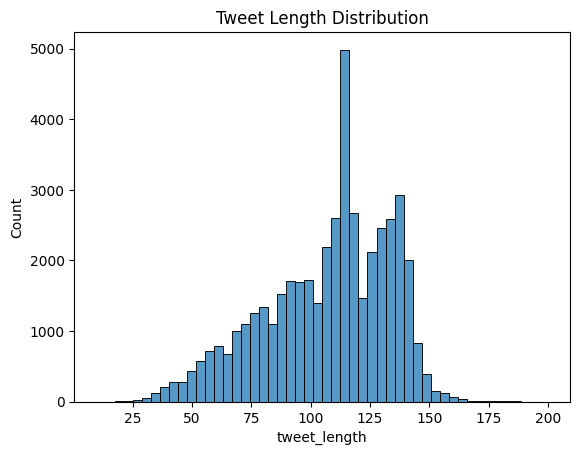

In [ ]:
sns.histplot(twitter_data['tweet_length'], bins=50)
plt.title("Tweet Length Distribution")
plt.show()

Tweet Length Distribution Pie Chart

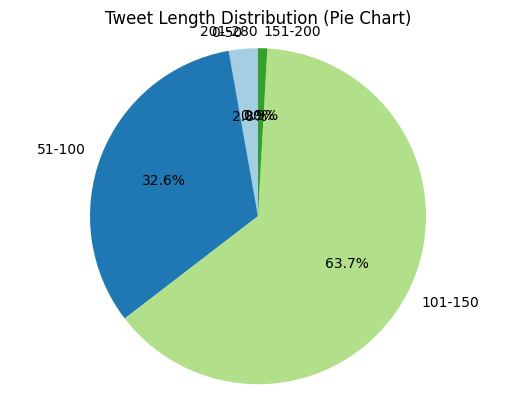

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate tweet length
twitter_data['tweet_length'] = twitter_data['text'].apply(len)

# Define categories
bins = [0, 50, 100, 150, 200, 280]  # Twitter max length = 280 chars
labels = ['0-50', '51-100', '101-150', '151-200', '201-280']

# Categorize tweets
twitter_data['length_category'] = pd.cut(twitter_data['tweet_length'], bins=bins, labels=labels, right=True)

# Count category frequencies
length_counts = twitter_data['length_category'].value_counts().sort_index()

# Plot pie chart
plt.pie(length_counts, labels=length_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Tweet Length Distribution (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio for perfect circle
plt.show()

Word Clouds - for each sentiment (positive & negative tweets)

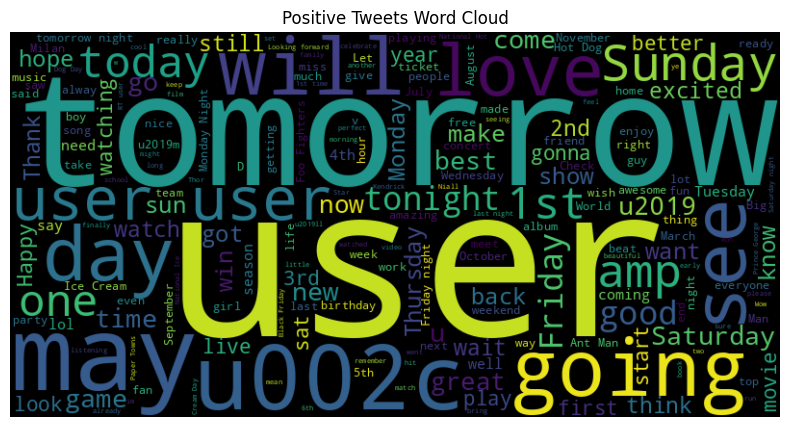

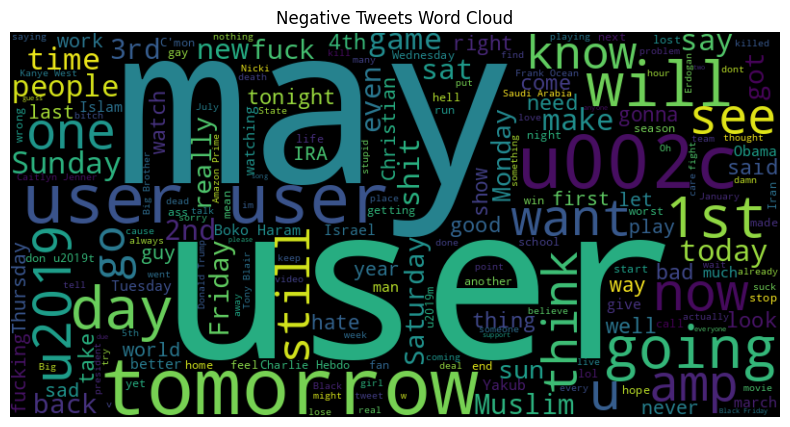

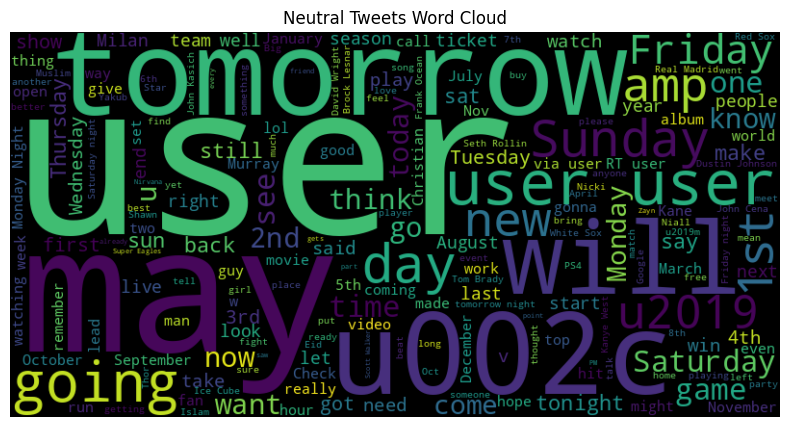

In [ ]:
from wordcloud import WordCloud

pos_text = " ".join(twitter_data[twitter_data['target'] == 2]['text'])
neg_text = " ".join(twitter_data[twitter_data['target'] == 0]['text'])
neutral_text = " ".join(twitter_data[twitter_data['target'] == 1]['text'])

# Positive tweets word cloud
pos_wc = WordCloud(width=800, height=400).generate(pos_text)
plt.figure(figsize=(10, 5))
plt.imshow(pos_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Tweets Word Cloud")
plt.show()

# Negative tweets word cloud
neg_wc = WordCloud(width=800, height=400).generate(neg_text)
plt.figure(figsize=(10, 5))
plt.imshow(neg_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Tweets Word Cloud")
plt.show()

# Neutral tweets word cloud
neutral_wc = WordCloud(width=800, height=400).generate(neutral_text)
plt.figure(figsize=(10, 5))
plt.imshow(neutral_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Neutral Tweets Word Cloud")
plt.show()


Most Frequently Used Words

/tmp/ipython-input-783924476.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words, palette='crest')


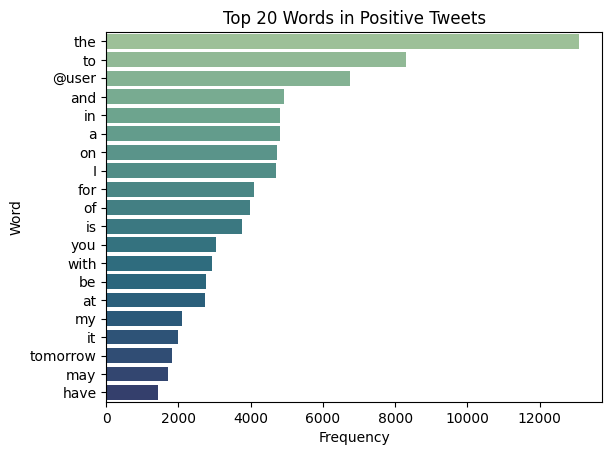

/tmp/ipython-input-783924476.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words, palette='crest')


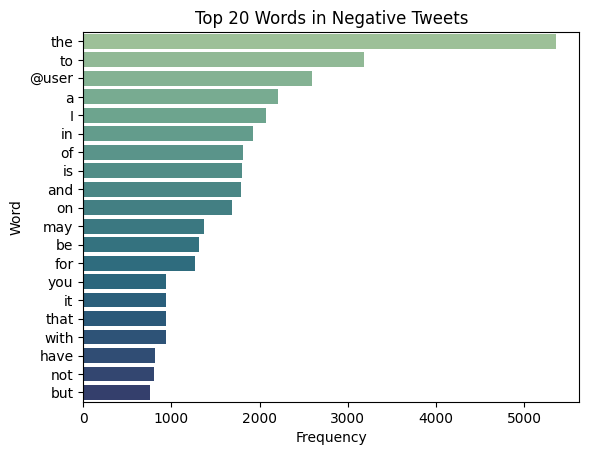

/tmp/ipython-input-783924476.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words, palette='crest')


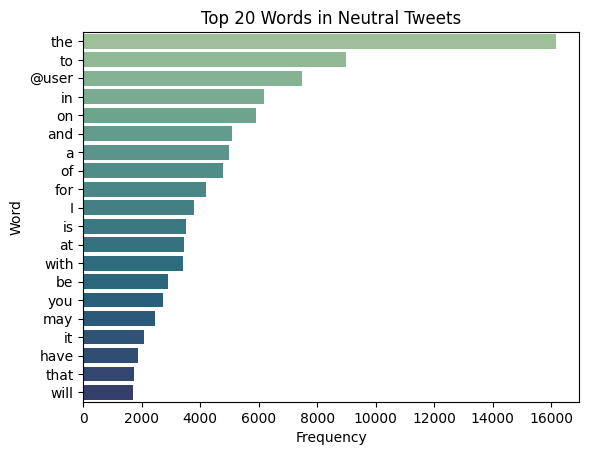

In [ ]:
from collections import Counter
import pandas as pd

# Positive tweets
positive_words = " ".join(twitter_data[twitter_data['target']==2]['text']).split()
word_freq = Counter(positive_words)
common_words = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])

sns.barplot(x='Frequency', y='Word', data=common_words, palette='crest')
plt.title('Top 20 Words in Positive Tweets')
plt.show()

# Negative Tweets
negative_words = " ".join(twitter_data[twitter_data['target']==0]['text']).split()
word_freq = Counter(negative_words)
common_words = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])

sns.barplot(x='Frequency', y='Word', data=common_words, palette='crest')
plt.title('Top 20 Words in Negative Tweets')
plt.show()

# Neutral Tweets
neutral_words = " ".join(twitter_data[twitter_data['target']==1]['text']).split()
word_freq = Counter(neutral_words)
common_words = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])

sns.barplot(x='Frequency', y='Word', data=common_words, palette='crest')
plt.title('Top 20 Words in Neutral Tweets')
plt.show()

**DATA PREPROCESSING**

Dropping the neutral rows

In [ ]:
# Drop rows where label == 1
twitter_data = twitter_data[twitter_data['target'] != 1].copy()

# Reset index after dropping
twitter_data = twitter_data.reset_index(drop=True)

print(twitter_data['target'].value_counts())
print(twitter_data.shape)

target
2    17840
0     7091
Name: count, dtype: int64
(24931, 6)


Converting the target label for positive tweets from '2' -> '1'

---



In [ ]:
 twitter_data.replace({'target':{2:1}},inplace=True)

In [ ]:
twitter_data.sample(5)

,text,target,tweet_length,length_category,clean_tweet,clean_tweet_length
16280,OMG I can't wait to see what Beyonce is gonna ...,1,81,51-100,omg cant wait see beyonce gonna vmas sunday au...,53
17196,I'm going home tomorrow and I better have powe...,1,93,51-100,im going home tomorrow better power house pm w...,62
10351,"@user the game where I took that photo, that w...",1,122,101-150,game took photo mother day gift momtoronto v r...,63
9632,My art Paint it black by The Rolling stones an...,1,85,51-100,art paint black rolling stone come sun george ...,54
2445,Remember the times we used to fast forward son...,1,127,101-150,remember time used fast forward song nickis pa...,84


In [ ]:
# Checking the ditribution of traget column
twitter_data['target'].value_counts()

,count
target,
1,17840
0,7091


'0' --> Negative Tweet


'1' --> Positive Tweet

Dropping columns that are not required

In [ ]:
# twitter_data= twitter_data.drop(columns=['ids', 'date', 'flag', 'user'])

In [ ]:
# twitter_data.head()

,target,text,tweet_length,length_category,clean_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,101-150,thats bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,111,101-150,upset cant update facebook texting might cry r...
2,0,@Kenichan I dived many times for the ball. Man...,89,51-100,dived many time ball managed save rest go bound
3,0,my whole body feels itchy and like its on fire,47,0-50,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",111,101-150,behaving im mad cant see


In [ ]:
twitter_data.shape

(24931, 6)

Removing Dupliactes

In [ ]:
twitter_data = twitter_data.drop_duplicates(subset='text')

In [ ]:
twitter_data.shape

(24931, 6)

**DATA CLEANING**

**STEMMING** - Process of reducing a word into it's key/root word

Example - actor,actress,acting = act

&

**REMOVING NOISY TWEETS** - like the ones having emojis, urls, etc which do not affect the sentiment of the tweet

&

**REMOVAL OF STOPWORDS** - Removing words like 'a','an','my', etc. that do not directly affect the sentiment of the tweet

from nltk.stem.porter import PorterStemmer
import re

port_stem = PorterStemmer()

def stemming(content):    # we will pass the text column as content in this stemming function
  stemmed_content= re.sub('[^a-zA-Z]'," ", content)   # Removing everything that is not a lowercase or uppercase letter in the tweet (eg- @,;,etc.)
  stemmed_content= stemmed_content.lower()   # converting upper case letters to lower case letters
  stemmed_content= stemmed_content.split()   # split all the stemmed content words from the teweet and store them in a list
  stemmed_content= [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]   # Performing stemming & Keeping only the words in the processed stem content that do not belong to the stopwords
  stemmed_content= ' '.join(stemmed_content)   # Joining all the words of stem content of a tweet into a single tweet

  return stemmed_content

- Applying the 'stemming' function to the dataset we have
- Creating a new column called 'stemmed_content'

twitter_data['stemmed_content']= twitter_data['text'].apply(stemming)

In [ ]:
'''
from nltk.stem.porter import PorterStemmer
import re

port_stem = PorterStemmer()
'''

'\nfrom nltk.stem.porter import PorterStemmer\nimport re\n\nport_stem = PorterStemmer()\n'

In [ ]:
'''
def stemming(content):    # we will pass the text column as content in this stemming function
  stemmed_content= re.sub('[^a-zA-Z]'," ", content)   # Removing everything that is not a lowercase or uppercase letter in the tweet (eg- @,;,etc.)
  stemmed_content= stemmed_content.lower()   # converting upper case letters to lower case letters
  stemmed_content= stemmed_content.split()   # split all the stemmed content words from the teweet and store them in a list
  stemmed_content= [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]   # Performing stemming & Keeping only the words in the processed stem content that do not belong to the stopwords
  stemmed_content= ' '.join(stemmed_content)   # Joining all the words of stem content of a tweet into a single tweet

  return stemmed_content
'''

'\ndef stemming(content):    # we will pass the text column as content in this stemming function\n  stemmed_content= re.sub(\'[^a-zA-Z]\'," ", content)   # Removing everything that is not a lowercase or uppercase letter in the tweet (eg- @,;,etc.)\n  stemmed_content= stemmed_content.lower()   # converting upper case letters to lower case letters\n  stemmed_content= stemmed_content.split()   # split all the stemmed content words from the teweet and store them in a list\n  stemmed_content= [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words(\'english\')]   # Performing stemming & Keeping only the words in the processed stem content that do not belong to the stopwords\n  stemmed_content= \' \'.join(stemmed_content)   # Joining all the words of stem content of a tweet into a single tweet\n\n  return stemmed_content\n'

In [ ]:
'''
# Applying the 'stemming' function to the dataset we have
# Creating a new column called 'stemmed_content'

twitter_data['stemmed_content']= twitter_data['text'].apply(stemming)
'''

"\n# Applying the 'stemming' function to the dataset we have\n# Creating a new column called 'stemmed_content'\n\ntwitter_data['stemmed_content']= twitter_data['text'].apply(stemming)\n"

**LEMMATIZATION**

In [ ]:
# ADVANCED TEXT PREPROCESSING

# This step cleans the tweets more aggressively than before to reduce noise and improve accuracy.

import re
import string
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_tweet(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove usernames
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags symbol (keep the text)
    text = re.sub(r'#', '', text)
    # Remove emojis and non-ASCII
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove repeated characters (e.g., loooove -> love)
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    # Tokenize and remove stopwords
    words = text.split()
    words = [w for w in words if w not in stop_words]
    # Lemmatize words
    words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(words)

# Apply cleaning to the dataset
twitter_data['clean_tweet'] = twitter_data['text'].apply(clean_tweet)
print("Sample cleaned tweets:", twitter_data['clean_tweet'].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Sample cleaned tweets: 0    qt original draft th book remus lupin survived...
1    alciato bee invest million january another sum...
2    lit mum kerry louboutins wonder many willam ow...
3    soul train oct halloween special ft tdot fines...
4    disappointed wwe summerslam want see john cena...
Name: clean_tweet, dtype: object


In [ ]:
twitter_data.sample(5)

,text,target,tweet_length,length_category,clean_tweet,clean_tweet_length
17189,@user @user @user @user @user Peace to you BiB...,1,90,51-100,peace bibi may almighty protect israel,38
22580,Many people on the planet have a death wish. T...,0,139,101-150,many people planet death wish dont care monsan...,87
3425,"""Well Obama, you sat on your ass, Eblola is ga...",0,140,101-150,well obama sat as eblola gaining ground isi eb...,88
12871,"""Kim Kardashian and Kanye West welcomed their ...",1,140,101-150,kim kardashian kanye west welcomed son world s...,93
19079,Christian Ponder may not be a great qb but he ...,1,110,101-150,christian ponder may great qb great individual...,65


In [ ]:
twitter_data.shape

(24931, 6)

In [ ]:
print(twitter_data['clean_tweet'])

0        qt original draft th book remus lupin survived...
1        alciato bee invest million january another sum...
2        lit mum kerry louboutins wonder many willam ow...
3        soul train oct halloween special ft tdot fines...
4        disappointed wwe summerslam want see john cena...
                               ...                        
24926    michael good time nd greatest michael michael ...
24927    think misguided girl vip tonight suckin dick w...
24928    amazing beautiful lady gaga show ac tonight lo...
24929    september arrived mean apple new iphone hour a...
24930    leeds sheff wed giuseppe bellusci securing luf...
Name: clean_tweet, Length: 24931, dtype: object


In [ ]:
# Separating the data (tweet/text) and label(target)
X= twitter_data['clean_tweet'].values
Y= twitter_data['target'].values

In [ ]:
print(X)

['qt original draft th book remus lupin survived battle hogwarts happybirthdayremuslupin'
 'alciato bee invest million january another summer plan bring messi'
 'lit mum kerry louboutins wonder many willam owns look kerry warner wednesday'
 ... 'amazing beautiful lady gaga show ac tonight love girl britney'
 'september arrived mean apple new iphone hour away becoming official thing'
 'leeds sheff wed giuseppe bellusci securing lufc point chris maguire opened scoring']


In [ ]:
print(Y)

[1 1 1 ... 1 1 1]


**TRAIN-TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# X_train, X_test, Y_train, Y_test are the 4 arrays
# X_train contains all the training data tweets and their corresponding targets are stored in the Y_train
# X_test contains all the test data tweets and their corresponding targets are stored in the Y_test
# test_size= 0.2 --> means 20% of the data is test data and the rest 80% data is used for training the ML model
# stratify=Y --> means that in the training Y_train data & the testing Y_test data , I want an almost equal proportion of 0 and 1 from the target column
# random_state= 'any no' --> everyone using the same value of random_state will have the same rows in the test data and the train data

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(24931,) (19944,) (4987,)


In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(24931,) (19944,) (4987,)


In [ ]:
print(X_train)

['malaysia airasia x suspend iran service malaysia longhaul arm budget carrier airasia said monday w'
 'dustin johnson straight dominating major thursday friday folding weekend boogersugarftw'
 'want dunkin tomorrow morning' ...
 'im going week january niigata far away xd im glad see kiryu event shinjuku blaze'
 'got tomorrow espanyol bilbaouc sociedad win osauna'
 'thanks still go back mother day th']


In [ ]:
print(X_test)

['wanna party justin get really drunk fuck like there tomorrow'
 'done final aka done school hot jam tonight lake compounce wednesday weekend graduate th happygirl thefuture'
 'think relationship btw uhuru amp ruto plasticits real royal amp trustfull case may'
 ... 'th play colt game back one dumbest decision ive ever seen'
 'misrepresentation said lot christian may full understanding trinitarian confession'
 'moto x style moto g rd gen handson via moto best']


**FEATURE EXTRACTION**

**TF-IDF Vectorizer** --> used to convert textual/raw data into numerical data, that the model can understand, based on the weights given to each word or phrase depeding on it's frequency. Lesser the frequency of a word, more is the wight associated to it.

Then the ML model will associate the numerical data,i.e, weights associated to the words/phrases to the target labels(0 or 1) and work on it.

TF-IDF stands for Term Frequency – Inverse Document Frequency.

It assigns a weight to each word (or phrase) based on:

Term Frequency (TF) → How often the word appears in a tweet.

Inverse Document Frequency (IDF) → How rare the word is across all tweets.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

In [ ]:
X_train= vectorizer.fit_transform(X_train)
X_test= vectorizer.transform(X_test)

In [ ]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 218616 stored elements and shape (19944, 26011)>
  Coords	Values
  (0, 13729)	0.499948863729979
  (0, 446)	0.5392331473214934
  (0, 22123)	0.28925871545650395
  (0, 11417)	0.18202378547898976
  (0, 20143)	0.19639223148891263
  (0, 13331)	0.28925871545650395
  (0, 1136)	0.2155046827118924
  (0, 3088)	0.24095021086626145
  (0, 3548)	0.2777687990721382
  (0, 19566)	0.15312418992294483
  (0, 14762)	0.12301696962486415
  (1, 6660)	0.27409130240310764
  (1, 11895)	0.26901997073898615
  (1, 21718)	0.27984907007158377
  (1, 6319)	0.4347919982908611
  (1, 13703)	0.2952020672673762
  (1, 22939)	0.19554571715938568
  (1, 8480)	0.1629586402136562
  (1, 8244)	0.4347919982908611
  (1, 24940)	0.23476916215456742
  (1, 2646)	0.4347919982908611
  (2, 24733)	0.46802593936981
  (2, 6634)	0.6447081228225487
  (2, 23185)	0.2966087275909762
  (2, 14858)	0.5266179062285049
  :	:
  (19941, 1508)	0.22600145975701408
  (19941, 24937)	0.20001284426664

In [ ]:
print(X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 50847 stored elements and shape (4987, 26011)>
  Coords	Values
  (0, 6550)	0.4669896845642301
  (0, 8577)	0.33189514774833123
  (0, 8938)	0.22693633250811932
  (0, 12045)	0.33054324033202515
  (0, 13065)	0.2209821542551872
  (0, 16782)	0.32573932250321247
  (0, 18442)	0.2839525306543545
  (0, 22743)	0.36525657570033215
  (0, 23185)	0.1592693999363946
  (0, 24730)	0.3415551879751272
  (1, 472)	0.2899456525125433
  (1, 6334)	0.45269480902801446
  (1, 7996)	0.23557109777380214
  (1, 9360)	0.3524923084391469
  (1, 10543)	0.2131173263166889
  (1, 11651)	0.27456315536396037
  (1, 12633)	0.30184516348953233
  (1, 19836)	0.21051272196479132
  (1, 22634)	0.1210079783621229
  (1, 22705)	0.3872544600730851
  (1, 23253)	0.16679193945927392
  (1, 24921)	0.1971614493978897
  (1, 24940)	0.2091009160457416
  (2, 750)	0.3784581396593813
  (2, 3059)	0.33204839717423423
  :	:
  (4983, 24415)	0.32677737923582384
  (4984, 1587)	0.231210659281849

All the words in each tweet get associated to a numerical value.

Example - here all the words in the tweet with 0 index are converted to numerical data

  (0, 222329)	0.45902566553974955
  (0, 286158)	0.36307656788596043
  (0, 358197)	0.30487157492746747
  (0, 408896)	0.663912210812278
  (0, 436771)	0.23863127215930252
  (0, 453351)	0.25845668749555184

**MODEL SELECTION AND TRAINING**

MODEL - **LOGISTIC REGRESSION**

LR is a classification model. Here, we have 2 classes - positive tweet & negative tweet

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model= LogisticRegression(class_weight='balanced', max_iter=1000)
# Making the class_weight='balanced' decreases the iimbalance in the dataset
# Max_iter --> means the maximum no of times (iterations) that the model has to go through the data

In [ ]:
model.fit(X_train, Y_train)  # Here, the model tries to map the words to positive or negative tweets

LogisticRegression(class_weight='balanced', max_iter=1000)

**MODEL EVALUATION**

ACCURACY SCORE

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Accuracy score on the training data
X_train_prediction= model.predict(X_train)    # Here, we just gave the model X_train data and now it will compute wether each tweet is a positive tweet('1') or negative tweet('0')
training_data_accuracy= accuracy_score(X_train_prediction, Y_train)   # Here, we will compare the accuracy between the actual Y_train and the prediction of the model


In [ ]:
print('The accuracy score on the training data is : ', training_data_accuracy)

The accuracy score on the training data is :  0.9036803048535901


In [ ]:
# Accuracy score on the testing data
X_test_prediction= model.predict(X_test)
testing_data_accuracy= accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('The accuracy score on the test data is : ', testing_data_accuracy)

The accuracy score on the test data is :  0.8301584118708643


CLASSIFICATION REPORT

In [ ]:
print("\nClassification Report:\n", classification_report(Y_test, X_test_prediction))


Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.77      0.72      1418
           1       0.90      0.85      0.88      3569

    accuracy                           0.83      4987
   macro avg       0.79      0.81      0.80      4987
weighted avg       0.84      0.83      0.83      4987



CONFUSION MATRIX

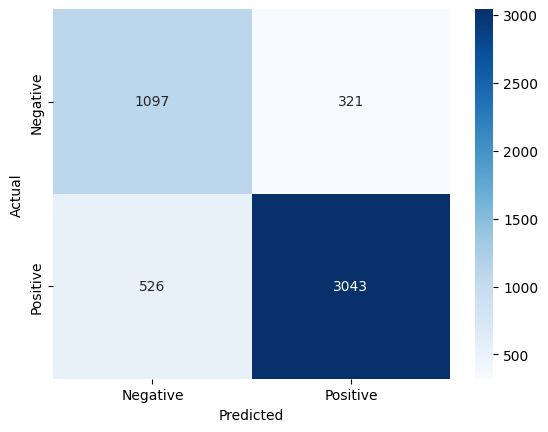

In [ ]:
cm = confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**SAVING MODEL FOR DEPLOYMENT**

In [ ]:
import pickle

In [ ]:
filename='trained_LE_model.sav'
pickle.dump(model,open(filename,'wb'))  # 'wb' --> means write-binary

**USING THE SAVED MODEL FOR PREDICTION ON NEW TWEETS**

In [ ]:
# Loading the saved model
loaded_model= pickle.load(open('/content/trained_LE_model.sav','rb'))

In [ ]:
X_new = X_test[2309]   # Randomly testing for the 23090th tweet of the X_test
print(Y_test[2309])

prediction = loaded_model.predict(X_new)
print(prediction)    # 'prediction' is stored in the form of a list

if (prediction[0]==0):     # prediction[0] --> means the first value from this 'prediction' list
  print('The tweet is negative')
else:
  print('The tweet is positive')

0
[0]
The tweet is negative


In [ ]:
X_new = X_test[98]   # Randomly testing for the 23090th tweet of the X_test
print(Y_test[98])

prediction = loaded_model.predict(X_new)
print(prediction)    # 'prediction' is stored in the form of a list

if (prediction[0]==0):     # prediction[0] --> means the first value from this 'prediction' list
  print('The tweet is negative')
else:
  print('The tweet is positive')

1
[1]
The tweet is positive


Therefore the model is predicting / working correctly !

**TF-IDF VECTORIZATION (TUNED) + LOGISTIC REGRESSION (TUNED)**

In [ ]:

# TF-IDF VECTORIZATION (TUNED) + LOGISTIC REGRESSION (TUNED)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# TF-IDF with bigrams/trigrams, min_df, max_df tuned

vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 3),
    min_df=3,
    max_df=0.9
)
X = vectorizer.fit_transform(twitter_data['clean_tweet'])
Y = twitter_data['target']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42
)




In [ ]:
# Logistic Regression with tuned hyperparameters

lr = LogisticRegression(max_iter=2000, class_weight='balanced', C=1000)

lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

print("Tuned Logistic Regression Test Accuracy:", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Tuned Logistic Regression Test Accuracy: 0.8141167034289152
              precision    recall  f1-score   support

           0       0.68      0.67      0.67      1418
           1       0.87      0.87      0.87      3569

    accuracy                           0.81      4987
   macro avg       0.77      0.77      0.77      4987
weighted avg       0.81      0.81      0.81      4987



**XGBOOST & RANDOM FOREST MODELS**

In [ ]:
!pip install xgboost


In [ ]:
# XGBOOST & RANDOM FOREST

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# ---------------------------
# 1. Compute class weights
# ---------------------------
# For binary classification: weight = total_samples / (2 * samples_per_class)
num_pos = np.sum(Y_train == 1)
num_neg = np.sum(Y_train == 0)
total = num_pos + num_neg

weight_neg = total / (2 * num_neg)
weight_pos = total / (2 * num_pos)

class_weights = {0: weight_neg, 1: weight_pos}

print("Class weights:", class_weights)

# ---------------------------
# 2. XGBoost model with balanced weight
# ---------------------------
# For XGBoost, scale_pos_weight = weight of positive class relative to negative
scale_pos_weight = weight_neg / weight_pos

xgb_model = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight
)
xgb_model.fit(X_train, Y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(Y_test, xgb_pred))
print(classification_report(Y_test, xgb_pred))

# ---------------------------
# 3. Random Forest model with balanced class weight
# ---------------------------
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    class_weight='balanced'  # automatically computes weights based on class frequency
)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(Y_test, rf_pred))
print(classification_report(Y_test, rf_pred))


Class weights: {0: np.float64(1.757800105764146), 1: np.float64(0.6987597225141896)}


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:04:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7934630038099058
              precision    recall  f1-score   support

           0       0.89      0.31      0.46      1418
           1       0.78      0.98      0.87      3569

    accuracy                           0.79      4987
   macro avg       0.84      0.65      0.67      4987
weighted avg       0.81      0.79      0.76      4987

Random Forest Accuracy: 0.7669941848806898
              precision    recall  f1-score   support

           0       0.57      0.72      0.64      1418
           1       0.87      0.79      0.83      3569

    accuracy                           0.77      4987
   macro avg       0.72      0.75      0.73      4987
weighted avg       0.79      0.77      0.77      4987



**NAIVE BAYES MODEL & SUPPORT VECTOR MACHINE (SVM) MODEL**

In [ ]:
# NAIVE BAYES MODEL

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# ---------------------------
# Compute class weights
# ---------------------------
num_pos = np.sum(Y_train == 1)
num_neg = np.sum(Y_train == 0)
total = num_pos + num_neg

weight_neg = total / (2 * num_neg)
weight_pos = total / (2 * num_pos)

# Assign sample weights for Naive Bayes
sample_weights = np.array([weight_pos if y==1 else weight_neg for y in Y_train])

print("Class weights:", {0: weight_neg, 1: weight_pos})

# ---------------------------
# Naive Bayes with sample weights
# ---------------------------
nb_model = MultinomialNB()
nb_model.fit(X_train, Y_train, sample_weight=sample_weights)
nb_pred = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(Y_test, nb_pred))
print(classification_report(Y_test, nb_pred))

# ---------------------------
# SVM with balanced class weight
# ---------------------------
svm_model = LinearSVC(class_weight='balanced', max_iter=5000)
svm_model.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(Y_test, svm_pred))
print(classification_report(Y_test, svm_pred))


Class weights: {0: np.float64(1.757800105764146), 1: np.float64(0.6987597225141896)}
Naive Bayes Accuracy: 0.815119310206537
              precision    recall  f1-score   support

           0       0.64      0.80      0.71      1418
           1       0.91      0.82      0.86      3569

    accuracy                           0.82      4987
   macro avg       0.78      0.81      0.79      4987
weighted avg       0.83      0.82      0.82      4987

SVM Accuracy: 0.8345698816924002
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1418
           1       0.90      0.87      0.88      3569

    accuracy                           0.83      4987
   macro avg       0.80      0.81      0.80      4987
weighted avg       0.84      0.83      0.84      4987



**MAXIMUM ENTROPY MODEL (MaxEnt)**

In [ ]:
# MAXIMUM ENTROPY MODEL (MaxEnt)

from sklearn.linear_model import LogisticRegression

maxent_model = LogisticRegression(
    solver='lbfgs',
    max_iter=2000,
    class_weight='balanced',
    C=1.0
)
maxent_model.fit(X_train, Y_train)
maxent_pred = maxent_model.predict(X_test)

print("MaxEnt Accuracy:", accuracy_score(Y_test, maxent_pred))
print(classification_report(Y_test, maxent_pred))

MaxEnt Accuracy: 0.8323641467816323
              precision    recall  f1-score   support

           0       0.68      0.78      0.73      1418
           1       0.91      0.85      0.88      3569

    accuracy                           0.83      4987
   macro avg       0.79      0.82      0.80      4987
weighted avg       0.84      0.83      0.84      4987



**NEURAL NETWORK (MLP CLASSIFIER)**

In [ ]:
# NEURAL NETWORK (MLP CLASSIFIER)

from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # 1 hidden layer, 100 neurons
    activation='relu',
    solver='adam',
    max_iter=300
)
mlp_model.fit(X_train, Y_train)
mlp_pred = mlp_model.predict(X_test)

print("MLP Accuracy:", accuracy_score(Y_test, mlp_pred))
print(classification_report(Y_test, mlp_pred))

MLP Accuracy: 0.8048927210747945
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      1418
           1       0.86      0.86      0.86      3569

    accuracy                           0.80      4987
   macro avg       0.76      0.76      0.76      4987
weighted avg       0.80      0.80      0.80      4987



**ENSEMBLE CLASSIFIER (Voting)**

In [ ]:
# ENSEMBLE CLASSIFIER (Voting)

from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# ---------------------------
# Compute class weights
# ---------------------------
num_pos = np.sum(Y_train == 1)
num_neg = np.sum(Y_train == 0)
total = num_pos + num_neg

weight_neg = total / (2 * num_neg)
weight_pos = total / (2 * num_pos)
print("Class weights:", {0: weight_neg, 1: weight_pos})

# ---------------------------
# Prepare sample weights for Naive Bayes
# ---------------------------
sample_weights = np.array([weight_pos if y==1 else weight_neg for y in Y_train])

# ---------------------------
# Create base learners with balanced weights
# ---------------------------
log_reg = LogisticRegression(max_iter=2000, class_weight='balanced', C=400)
svm = LinearSVC(class_weight='balanced', max_iter=5000)
nb = MultinomialNB()

# Fit Naive Bayes separately with sample weights
nb.fit(X_train, Y_train, sample_weight=sample_weights)

# ---------------------------
# Voting Classifier
# ---------------------------
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('nb', nb),
        ('svm', svm)
    ],
    voting='hard'
)

# Fit the ensemble (log_reg and svm will be fitted automatically)
ensemble_model.fit(X_train, Y_train)
ensemble_pred = ensemble_model.predict(X_test)

# ---------------------------
# Evaluation
# ---------------------------
print("Ensemble Accuracy:", accuracy_score(Y_test, ensemble_pred))
print(classification_report(Y_test, ensemble_pred))


Class weights: {0: np.float64(1.757800105764146), 1: np.float64(0.6987597225141896)}
Ensemble Accuracy: 0.8375777020252657
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      1418
           1       0.88      0.90      0.89      3569

    accuracy                           0.84      4987
   macro avg       0.80      0.79      0.80      4987
weighted avg       0.84      0.84      0.84      4987



In [ ]:
# ADVANCED TEXT PREPROCESSING

# This step cleans the tweets more aggressively than before to reduce noise and improve accuracy.

import re
import string
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_tweet(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove usernames
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags symbol (keep the text)
    text = re.sub(r'#', '', text)
    # Remove emojis and non-ASCII
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove repeated characters (e.g., loooove -> love)
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    # Tokenize and remove stopwords
    words = text.split()
    words = [w for w in words if w not in stop_words]
    # Lemmatize words
    words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(words)

# Apply cleaning to the dataset
twitter_data['clean_tweet'] = twitter_data['text'].apply(clean_tweet)
print("Sample cleaned tweets:", twitter_data['clean_tweet'].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Sample cleaned tweets: 0        thats bummer shoulda got david carr third day
1    upset cant update facebook texting might cry r...
2      dived many time ball managed save rest go bound
3                      whole body feel itchy like fire
4                             behaving im mad cant see
Name: clean_tweet, dtype: object


In [ ]:
twitter_data.head()

,text,target,tweet_length,length_category,clean_tweet,clean_tweet_length
0,"""QT @user In the original draft of the 7th boo...",1,119,101-150,qt original draft th book remus lupin survived...,86
1,@user Alciato: Bee will invest 150 million in ...,1,114,101-150,alciato bee invest million january another sum...,66
2,@user LIT MY MUM 'Kerry the louboutins I wonde...,1,101,101-150,lit mum kerry louboutins wonder many willam ow...,76
3,"""\"""""""" SOUL TRAIN\"""""""" OCT 27 HALLOWEEN SPECIA...",1,145,101-150,soul train oct halloween special ft tdot fines...,104
4,So disappointed in wwe summerslam! I want to s...,0,78,51-100,disappointed wwe summerslam want see john cena...,59


Text length distribution of clean_tweets

In [ ]:
twitter_data['clean_tweet_length'] = twitter_data['clean_tweet'].apply(len)
twitter_data.head()

,text,target,tweet_length,length_category,clean_tweet,clean_tweet_length
0,"""QT @user In the original draft of the 7th boo...",1,119,101-150,qt original draft th book remus lupin survived...,86
1,@user Alciato: Bee will invest 150 million in ...,1,114,101-150,alciato bee invest million january another sum...,66
2,@user LIT MY MUM 'Kerry the louboutins I wonde...,1,101,101-150,lit mum kerry louboutins wonder many willam ow...,76
3,"""\"""""""" SOUL TRAIN\"""""""" OCT 27 HALLOWEEN SPECIA...",1,145,101-150,soul train oct halloween special ft tdot fines...,104
4,So disappointed in wwe summerslam! I want to s...,0,78,51-100,disappointed wwe summerslam want see john cena...,59


Histogram showing clean_tweet_length ditribution

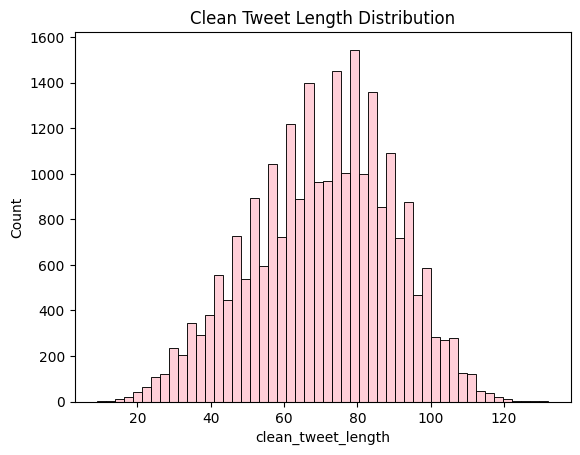

In [ ]:
sns.histplot(twitter_data['clean_tweet_length'], bins=50, color='pink')
plt.title("Clean Tweet Length Distribution")
plt.show()

Visual Comparision between 'Original Tweet Length' and 'Clean Tweet Length'

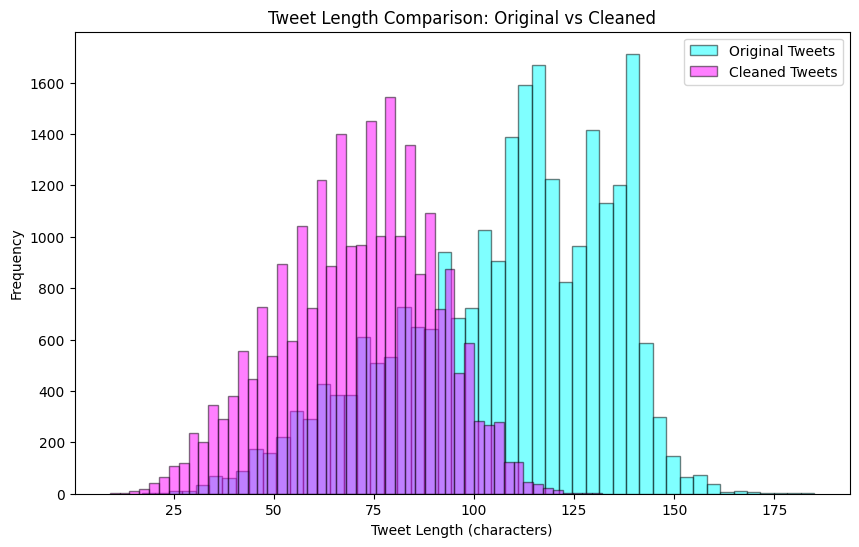

In [ ]:
# Plot comparison
plt.figure(figsize=(10,6))
plt.hist(twitter_data['tweet_length'], bins=50, alpha=0.5, label='Original Tweets', color='cyan', edgecolor='black')
plt.hist(twitter_data['clean_tweet_length'], bins=50, alpha=0.5, label='Cleaned Tweets', color='magenta', edgecolor='black')

plt.title('Tweet Length Comparison: Original vs Cleaned')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
twitter_data['target'].value_counts()

,count
target,
1,17840
0,7091


**DistilBERT**

Creating a sample of 100000 tweets and applying the DistilBERT on it

In [ ]:
# Install required libraries
!pip install transformers datasets scikit-learn --quiet

In [ ]:
# installing upgraded form

!pip install --upgrade transformers

In [ ]:
# installing upgraded form

!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 94.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.55.0
    Uninstalling transformers-4.55.0:
      Successfully uninstalled transformers-4.55.0


In [ ]:
import transformers
print(transformers.__version__)
print(transformers.__file__)


4.55.2
/usr/local/lib/python3.11/dist-packages/transformers/__init__.py


In [ ]:
!pip uninstall -y transformers
!pip install --no-cache-dir transformers==4.55.2


Found existing installation: transformers 4.55.2
Uninstalling transformers-4.55.2:
  Successfully uninstalled transformers-4.55.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 140.7 MB/s eta 0:00:00


In [ ]:
import transformers
print(transformers.__version__)


4.55.2


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import pandas as pd

# ---------------------------
# 1. Dataset Class
# ---------------------------
class TweetDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=64):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        item = {key: val.squeeze(0) for key, val in encoding.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

# ---------------------------
# 2. Full dataset (imbalanced)
# ---------------------------
df_pos = twitter_data[twitter_data['target'] == 1]  # 17,840 rows
df_neg = twitter_data[twitter_data['target'] == 0]  # 7,091 rows
df_sample = pd.concat([df_pos, df_neg]).sample(frac=1, random_state=42).reset_index(drop=True)

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_sample['clean_tweet'].tolist(),
    df_sample['target'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=df_sample['target']
)

# ---------------------------
# 3. Tokenizer & Datasets
# ---------------------------
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
train_dataset = TweetDataset(train_texts, train_labels, tokenizer)
test_dataset = TweetDataset(test_texts, test_labels, tokenizer)

# ---------------------------
# 4. Model & Device
# ---------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=2
)
model.to(device)

# ---------------------------
# 5. Dataloaders
# ---------------------------
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# ---------------------------
# 6. Optimizer
# ---------------------------
optimizer = AdamW(model.parameters(), lr=5e-5)

# ---------------------------
# 7. Class weights for imbalance
# ---------------------------
# weight = total_samples / (num_classes * samples_per_class)
num_pos = len(df_pos)
num_neg = len(df_neg)
total = num_pos + num_neg
weight_neg = total / (2 * num_neg)
weight_pos = total / (2 * num_pos)

class_weights = torch.tensor([weight_neg, weight_pos]).to(device)

# ---------------------------
# 8. Training Loop with weighted loss
# ---------------------------
from torch.nn import CrossEntropyLoss

epochs = 2
for epoch in range(epochs):
    # Training
    model.train()
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        loss_fn = CrossEntropyLoss(weight=class_weights)
        loss = loss_fn(logits, labels)

        loss.backward()
        optimizer.step()

        loop.set_description(f"Epoch {epoch+1}")
        loop.set_postfix(loss=loss.item())

    # Evaluation
    model.eval()
    preds, true_labels = [], []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)

            preds.extend(predictions.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(true_labels, preds)
    print(f"\nEpoch {epoch+1} Test Accuracy: {acc:.4f}")
    print(classification_report(true_labels, preds))


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1: 100%|██████████| 1247/1247 [02:00<00:00, 10.34it/s, loss=0.331]



Epoch 1 Test Accuracy: 0.8697
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1418
           1       0.92      0.90      0.91      3569

    accuracy                           0.87      4987
   macro avg       0.84      0.85      0.84      4987
weighted avg       0.87      0.87      0.87      4987



Epoch 2: 100%|██████████| 1247/1247 [02:02<00:00, 10.21it/s, loss=0.224]



Epoch 2 Test Accuracy: 0.8522
              precision    recall  f1-score   support

           0       0.69      0.86      0.77      1418
           1       0.94      0.85      0.89      3569

    accuracy                           0.85      4987
   macro avg       0.82      0.86      0.83      4987
weighted avg       0.87      0.85      0.86      4987



**LOGISTIC REGRESSION MODEL (WITH HYPERPARAMETER TUNING)**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# ---------------------------
# 1️⃣ Use entire dataset
# ---------------------------
X = twitter_data['clean_tweet']
y = twitter_data['target']

# ---------------------------
# 2️⃣ Split data
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
# 3️⃣ TF-IDF Vectorization
# ---------------------------
vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# ---------------------------
# 4️⃣ Logistic Regression with class_weight='balanced' & hyperparameter tuning
# ---------------------------
lr = LogisticRegression(
    solver='saga',
    max_iter=2000,
    random_state=42,
    class_weight='balanced'  # balances minority/majority class
)

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1','l2']
}

grid_search = GridSearchCV(
    lr,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train_tfidf, y_train)

print("Best Parameters:", grid_search.best_params_)

# ---------------------------
# 5️⃣ Evaluate on test set
# ---------------------------
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test_tfidf)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 1, 'penalty': 'l1'}
Test Accuracy: 0.8077000200521356
              precision    recall  f1-score   support

           0       0.63      0.77      0.69      1418
           1       0.90      0.82      0.86      3569

    accuracy                           0.81      4987
   macro avg       0.77      0.80      0.78      4987
weighted avg       0.82      0.81      0.81      4987



**COMPARING ALL MODELS**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Making a dictionary of all the model's accuracies

model_accuracies = {
    'Logistic Regression' : 0.8301584118708643,
    'Logistic Regression (Tuned)' : 0.8141167034289152,
    'XGBOOST' : 0.7934630038099058,
    'Random Forest' : 0.7669941848806898,
    'Naive Bayes' : 0.815119310206537,
    'Support Vector Machine (SVM)' : 0.8345698816924002,
    'Maximum Entropy Model (MaxEnt)' : 0.8323641467816323,
    'Neural Network (MLP)' : 0.8048927210747945,
    'Ensemble Classifier (Voting)' : 0.8375777020252657,
    'DistilBERT' : 0.8697,
    'Embedding (LR)' : 0.8427912572688991,
    'Embedding (XGBOOST)' : 0.8510126328453981

}

# Extract names and scores
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

**BAR CHART**

/tmp/ipython-input-2984560919.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


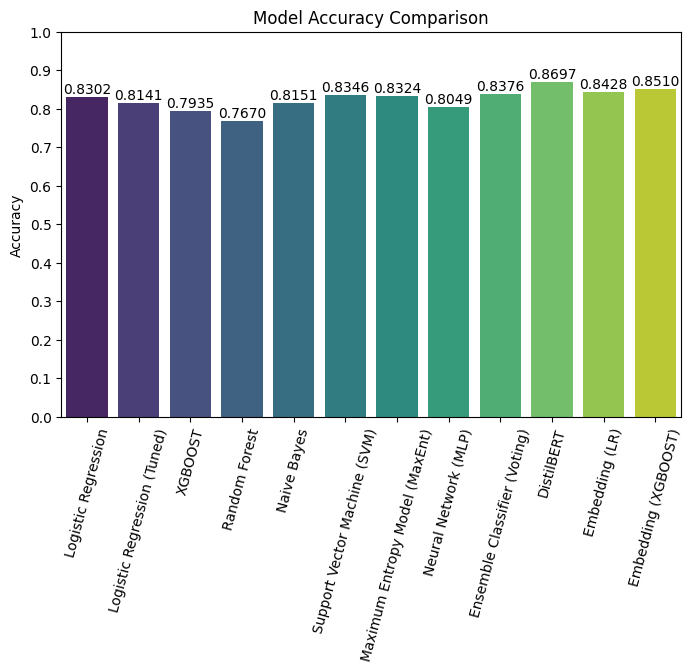

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=75)

plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center')

**PIE CHART**

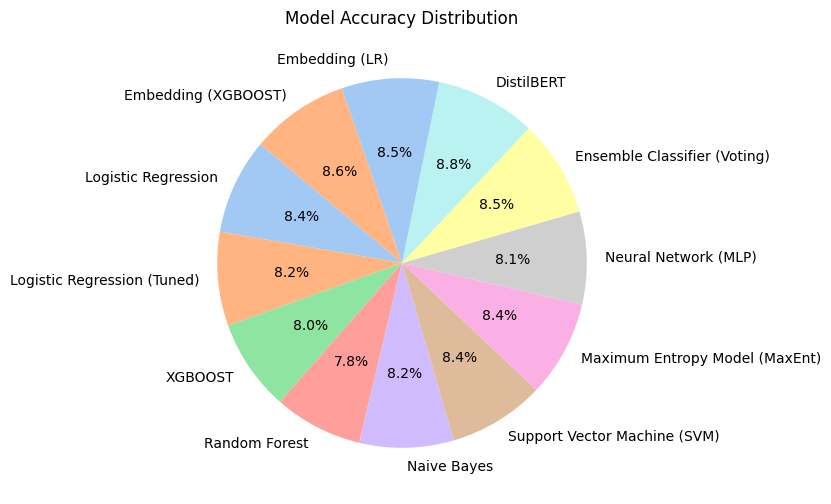

In [8]:
plt.figure(figsize=(6,6))
plt.pie(accuracies, labels=models, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel", len(models)))
plt.title("Model Accuracy Distribution")
plt.show()

**HISTOGRAM**

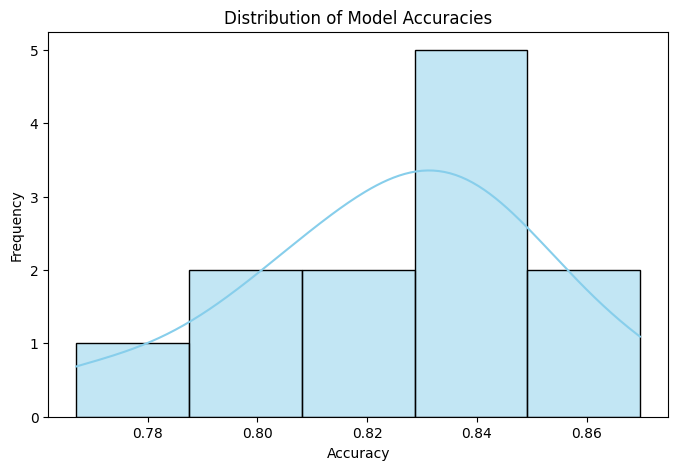

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(accuracies, bins=5, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Model Accuracies")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.show()

**BEST ACCURACY MODEL - DistilBERT (Hugging Face model)**

**Accuracy = 78.65 %**

17 AUG

Embedding model

In [ ]:
# Install required libraries
!pip install sentence-transformers scikit-learn xgboost

from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier


texts = twitter_data['clean_tweet'].astype(str).tolist()
labels = twitter_data['target'].tolist()

# --------------------------
# 2. Generate embeddings
# --------------------------
print("Generating embeddings... this may take some time.")
embedder = SentenceTransformer('all-MiniLM-L6-v2')
# Try 'all-mpnet-base-v2' for better accuracy (slower)
X = embedder.encode(texts, batch_size=32, show_progress_bar=True)
y = labels

# --------------------------
# 3. Train-test split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --------------------------
# 4A. Logistic Regression
# --------------------------
clf_lr = LogisticRegression(max_iter=5000, class_weight='balanced')
clf_lr.fit(X_train, y_train)

y_pred_lr = clf_lr.predict(X_test)
print("\n===== Logistic Regression =====")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# --------------------------
# 4B. XGBoost Classifier
# --------------------------

# Calculate scale_pos_weight
num_positive = sum(y_train)  # assuming positive class is labeled as 1
num_negative = len(y_train) - num_positive
scale_pos_weight = num_negative / num_positive

# XGBoost Classifier with balanced weights
clf_xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight  # balance the classes
)

# Train
clf_xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = clf_xgb.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report
print("\n===== XGBoost (Balanced) =====")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

Generating embeddings... this may take some time.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/780 [00:00<?, ?it/s]


===== Logistic Regression =====
Accuracy: 0.8427912572688991
              precision    recall  f1-score   support

           0       0.68      0.83      0.75      1418
           1       0.93      0.85      0.89      3569

    accuracy                           0.84      4987
   macro avg       0.81      0.84      0.82      4987
weighted avg       0.86      0.84      0.85      4987



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:34:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



===== XGBoost (Balanced) =====
Accuracy: 0.8510126328453981
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1418
           1       0.89      0.90      0.90      3569

    accuracy                           0.85      4987
   macro avg       0.82      0.81      0.81      4987
weighted avg       0.85      0.85      0.85      4987



DRAWING ROC CURVE FOR DistilBERT

Running DistilBERT code again

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import pandas as pd

# ---------------------------
# 1. Dataset Class
# ---------------------------
class TweetDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=64):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        item = {key: val.squeeze(0) for key, val in encoding.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

# ---------------------------
# 2. Full dataset (imbalanced)
# ---------------------------
df_pos = twitter_data[twitter_data['target'] == 1]  # 17,840 rows
df_neg = twitter_data[twitter_data['target'] == 0]  # 7,091 rows
df_sample = pd.concat([df_pos, df_neg]).sample(frac=1, random_state=42).reset_index(drop=True)

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_sample['clean_tweet'].tolist(),
    df_sample['target'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=df_sample['target']
)

# ---------------------------
# 3. Tokenizer & Datasets
# ---------------------------
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
train_dataset = TweetDataset(train_texts, train_labels, tokenizer)
test_dataset = TweetDataset(test_texts, test_labels, tokenizer)

# ---------------------------
# 4. Model & Device
# ---------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
distilbert_model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=2
)
distilbert_model.to(device)

# ---------------------------
# 5. Dataloaders
# ---------------------------
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# ---------------------------
# 6. Optimizer
# ---------------------------
optimizer = AdamW(distilbert_model.parameters(), lr=5e-5)

# ---------------------------
# 7. Class weights for imbalance
# ---------------------------
# weight = total_samples / (num_classes * samples_per_class)
num_pos = len(df_pos)
num_neg = len(df_neg)
total = num_pos + num_neg
weight_neg = total / (2 * num_neg)
weight_pos = total / (2 * num_pos)

class_weights = torch.tensor([weight_neg, weight_pos]).to(device)

# ---------------------------
# 8. Training Loop with weighted loss
# ---------------------------
from torch.nn import CrossEntropyLoss

epochs = 2
for epoch in range(epochs):
    # Training
    distilbert_model.train()
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = distilbert_model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        loss_fn = CrossEntropyLoss(weight=class_weights)
        loss = loss_fn(logits, labels)

        loss.backward()
        optimizer.step()

        loop.set_description(f"Epoch {epoch+1}")
        loop.set_postfix(loss=loss.item())

    # Evaluation
    distilbert_model.eval()
    preds, true_labels = [], []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = distilbert_model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)

            preds.extend(predictions.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(true_labels, preds)
    print(f"\nEpoch {epoch+1} Test Accuracy: {acc:.4f}")
    print(classification_report(true_labels, preds))


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1: 100%|██████████| 1247/1247 [02:05<00:00,  9.90it/s, loss=0.509]



Epoch 1 Test Accuracy: 0.8300
              precision    recall  f1-score   support

           0       0.64      0.90      0.75      1418
           1       0.95      0.80      0.87      3569

    accuracy                           0.83      4987
   macro avg       0.80      0.85      0.81      4987
weighted avg       0.87      0.83      0.84      4987



Epoch 2: 100%|██████████| 1247/1247 [02:02<00:00, 10.19it/s, loss=0.0539]



Epoch 2 Test Accuracy: 0.8659
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1418
           1       0.92      0.89      0.90      3569

    accuracy                           0.87      4987
   macro avg       0.83      0.85      0.84      4987
weighted avg       0.87      0.87      0.87      4987



DRAWING ROC CURVE FOR ALL 10 SKLEARN MODELS AND DistilBERT

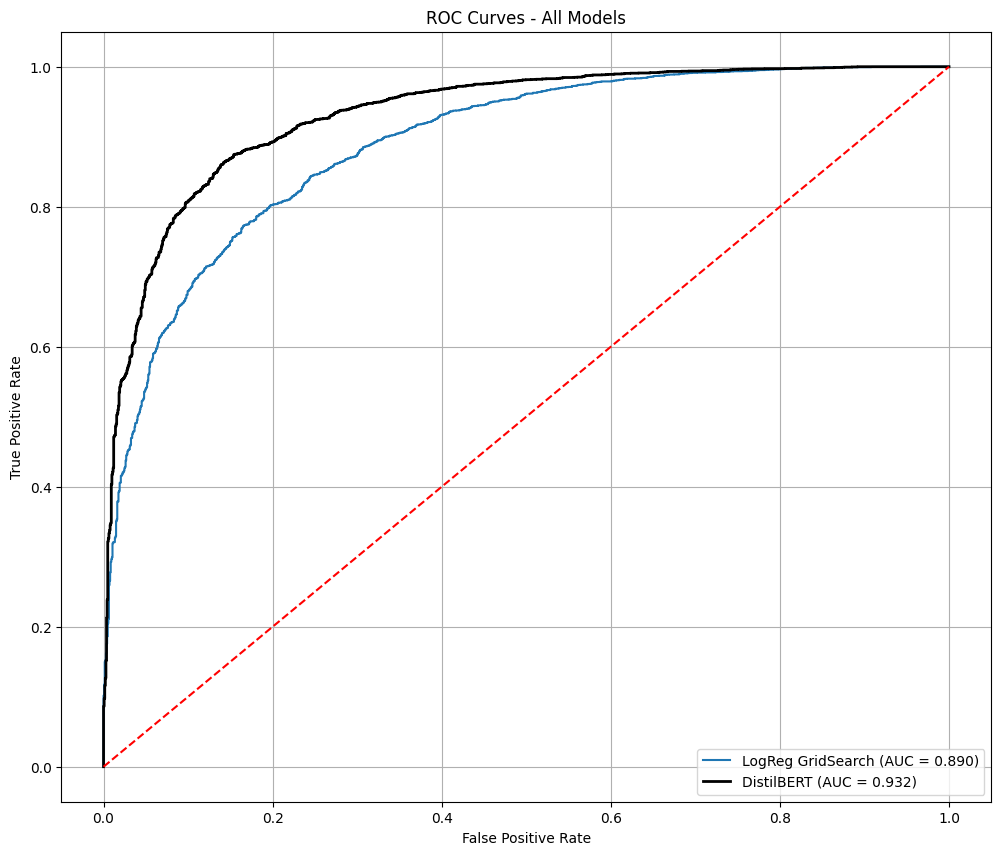

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
import torch
import torch.nn.functional as F

# ---------------------------
# 1️⃣ DistilBERT Model
# ---------------------------
# Make sure your PyTorch DistilBERT is stored in a separate variable
# Example:
# distilbert_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
# distilbert_model.to(device)

distilbert_model.eval()  # only PyTorch model
distilbert_probs = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = distilbert_model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probs = F.softmax(logits, dim=1)[:,1]  # positive class probability

        distilbert_probs.extend(probs.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

distilbert_probs = np.array(distilbert_probs)
all_labels = np.array(all_labels)

# ---------------------------
# 2️⃣ Sklearn Models
# ---------------------------
# Make sure these are sklearn models (no .eval, no torch)
model_dict = {
    "LogReg": log_reg,                    # basic Logistic Regression
    "LogReg GridSearch": best_lr,         # hyperparameter tuned Logistic Regression
    "MaxEnt": maxent_model,               # Maximum Entropy
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "Naive Bayes": nb_model,
    "SVM": svm_model,
    "MLP": mlp_model,
    "Voting Ensemble": ensemble_model
}

# ---------------------------
# 3️⃣ Plot ROC curves
# ---------------------------
plt.figure(figsize=(12,10))

for name, m in model_dict.items():
    try:
        if hasattr(m, "predict_proba"):
            y_prob = m.predict_proba(X_test_tfidf)[:,1]
        else:
            # For models without predict_proba (LinearSVC, MLP)
            y_prob = m.decision_function(X_test_tfidf)
            # Normalize to 0-1
            y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())
    except:
        continue

    fpr, tpr, _ = roc_curve(all_labels, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# ---------------------------
# DistilBERT ROC
# ---------------------------
fpr, tpr, _ = roc_curve(all_labels, distilbert_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"DistilBERT (AUC = {roc_auc:.3f})", color='black', linewidth=2)

# ---------------------------
# 4️⃣ Plot formatting
# ---------------------------
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
